In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from utils import sampleSplicing as sp
%matplotlib inline

In [2]:
#path to files
filePath = '/Users/benthompson/Google Drive/MIDS/210/w210-Capstone-AstroDrum/Kick Drums/'

In [3]:
#get two kick filenames from path
kick1, kick2 = sp.randFiles(filePath)
print('{} and {} are the kick files being used.'.format(kick1,kick2))

#read in kick files
k1 = wavfile.read(filePath+kick1)
k2 = wavfile.read(filePath+kick2)

VEE Bassdrum 220.wav and VEH2 Soft Kicks - 021.wav are the kick files being used.


/Users/benthompson/anaconda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


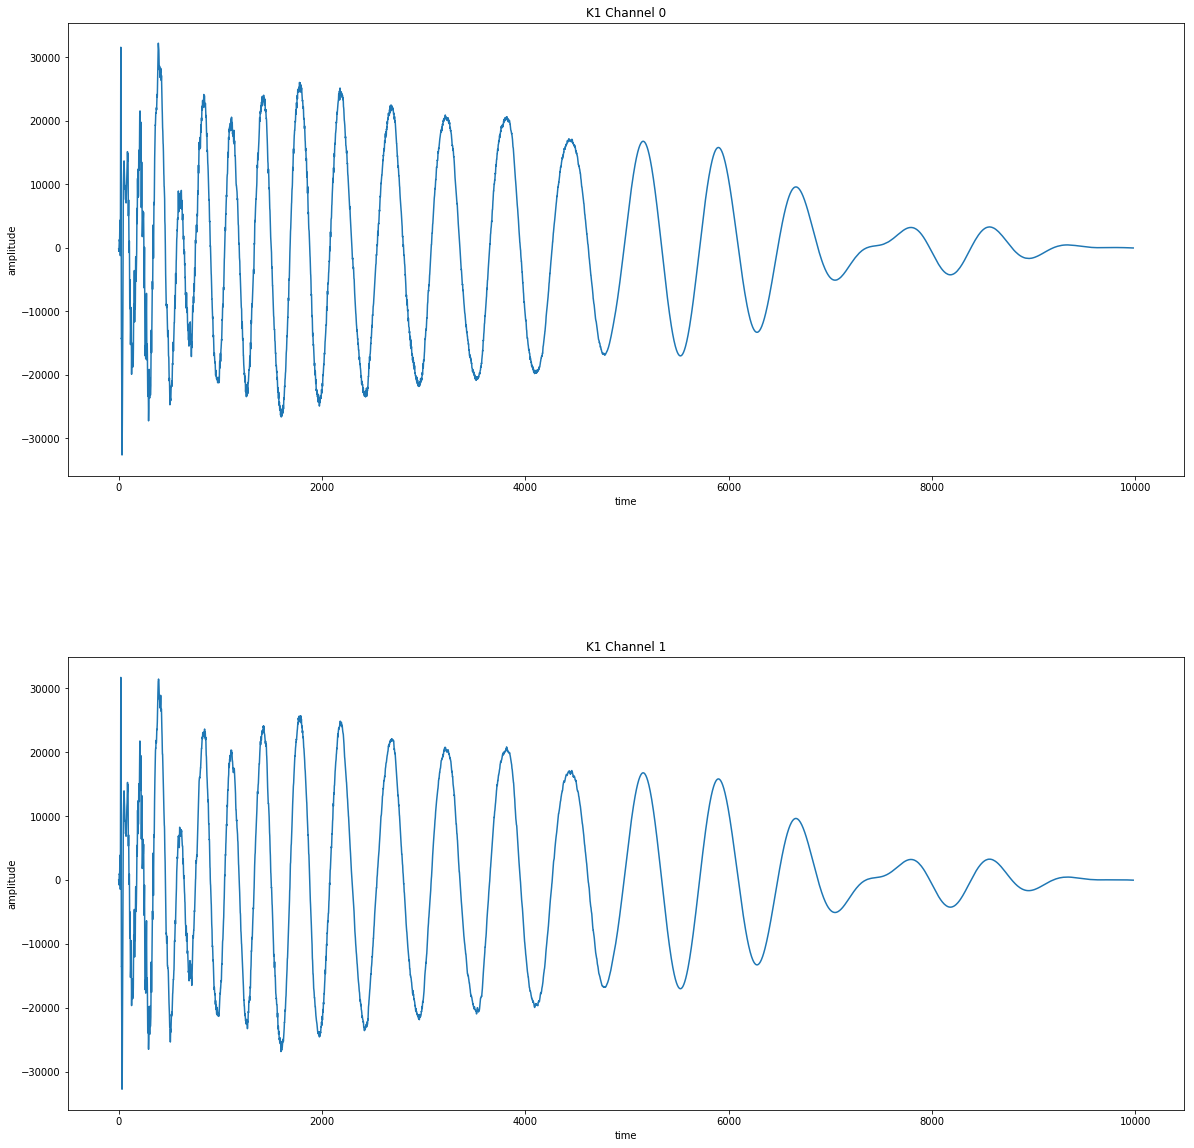

In [4]:
#look at kick1
plt.figure(figsize=(20,20))
for i in [0,1]:
    plt.subplot(2, 1, i+1)
    plt.plot(k1[1][:,i])
    plt.xlabel('time')
    plt.ylabel('amplitude')
    plt.title('K1 Channel ' + str(i))
    plt.subplots_adjust(wspace=.4, hspace=.4)

In [5]:
#listen to kick 1
#play file
#have to rerun cell each time want to play
#correct sound. If keep hitting play wo
#rerunning cell it doesn't play full sample
ipd.Audio(filePath+kick1)

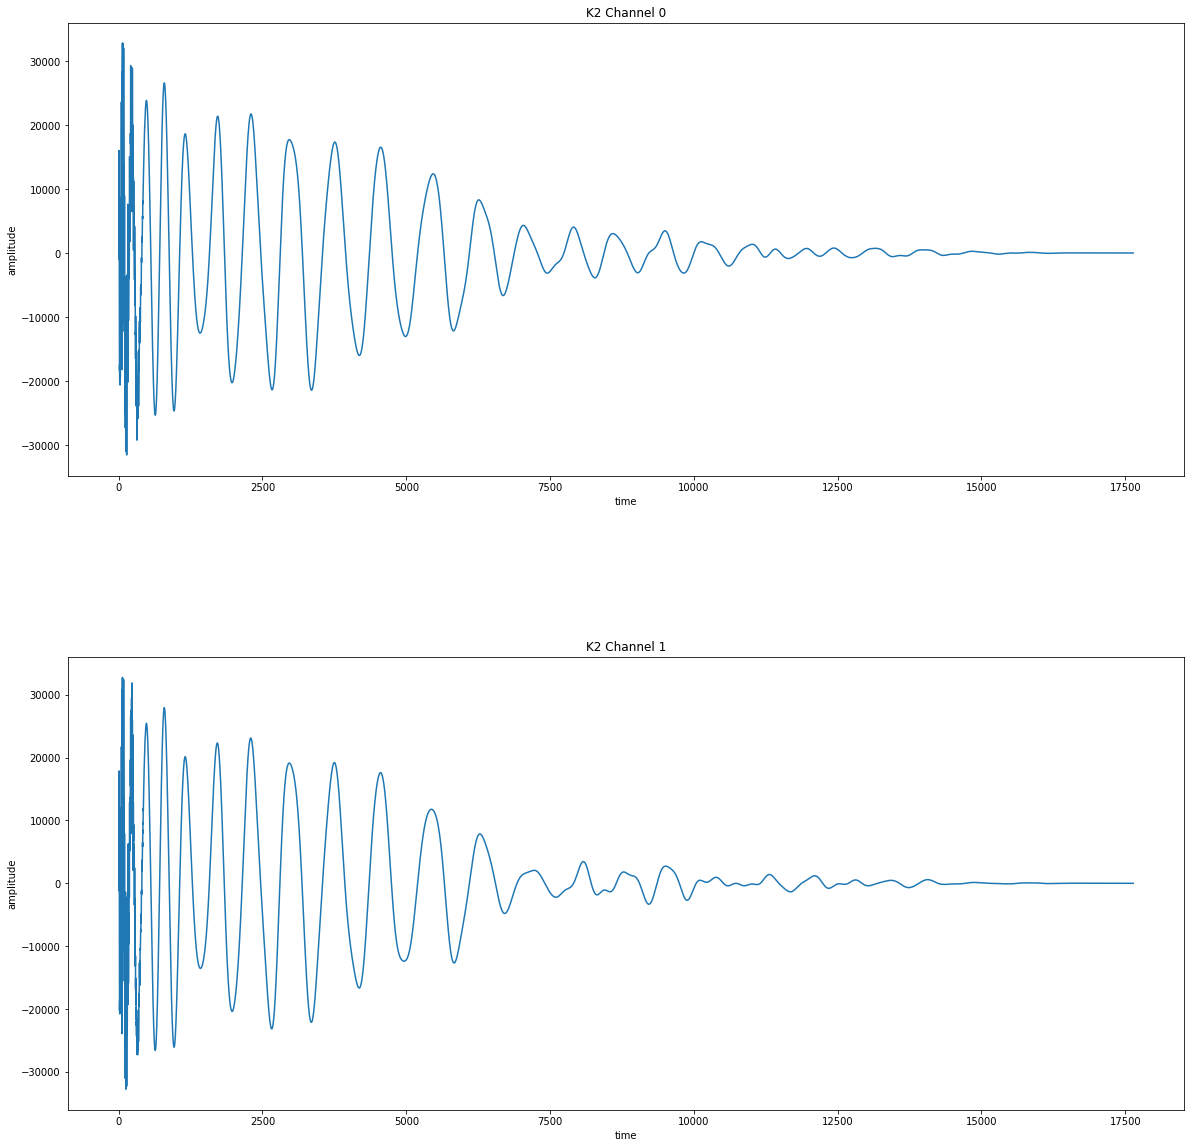

In [6]:
#look at kick2
plt.figure(figsize=(20,20))
for i in [0,1]:
    plt.subplot(2, 1, i+1)
    plt.plot(k2[1][:,i])
    plt.xlabel('time')
    plt.ylabel('amplitude')
    plt.title('K2 Channel ' + str(i))
    plt.subplots_adjust(wspace=.4, hspace=.4)

In [110]:
#listen to kick 2
#play file
#have to rerun cell each time want to play
#correct sound. If keep hitting play wo
#rerunning cell it doesn't play full sample
ipd.Audio(filePath+kick2)

In [7]:
#randomly choose ms for split
choices = [20,30,40,50,60,70,80,90,100]
ms = np.random.choice(choices)
print('ms is {}'.format(ms))

#split kick 1 and 2
k1_1,k1_2 = sp.splice(k1,20,stereo=True)
k2_1,k2_2 = sp.splice(k2,20,stereo=True)

#melt into 2 new sounds
meltedk1 = sp.melt(k1_1,k2_2)
meltedk2 = sp.melt(k2_1,k1_2)

ms is 90


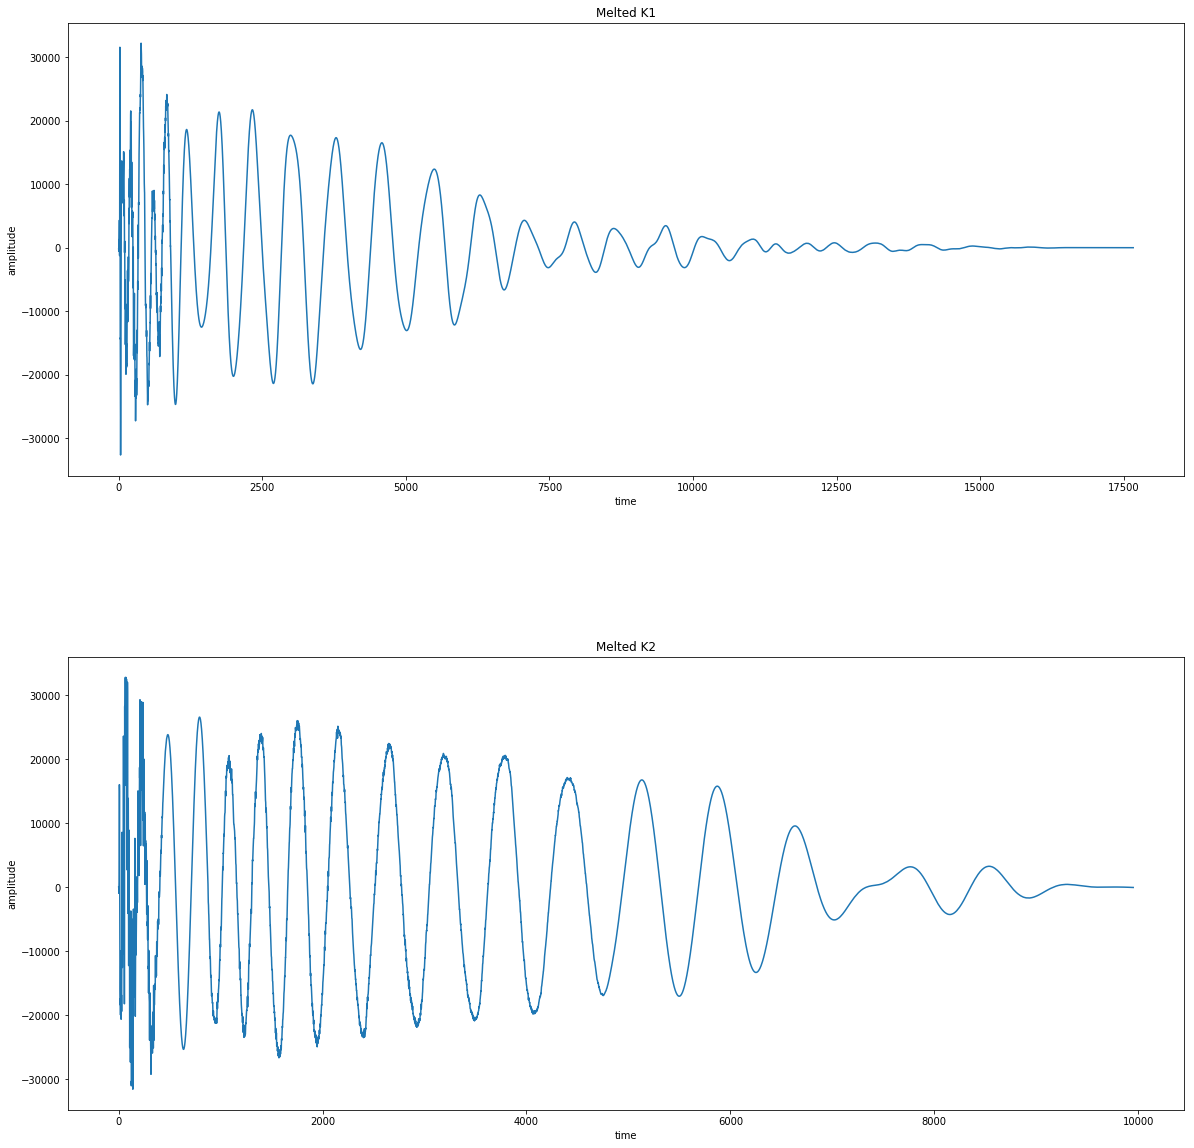

In [8]:
#look at meltedk1
plt.figure(figsize=(20,20))
plt.subplot(2, 1, 1)
plt.plot(meltedk1[:,0])
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Melted K1')
plt.subplot(2, 1, 2)
plt.plot(meltedk2[:,0])
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Melted K2')
plt.subplots_adjust(wspace=.4, hspace=.4)

In [12]:
#play it - FOR NOW JUST DOING ONE CHANNEL NOT SURE HOW TO DO BOTH
ipd.Audio(meltedk1[:,0], rate=44100)

In [16]:
meltedk1

array([[-186,    8],
       [-550, -521],
       [-573, -773],
       ..., 
       [   0,    1],
       [  -1,    0],
       [   0,    1]], dtype=int16)

In [19]:
#export sample
wavfile.write('testmelt.wav',rate=44100,data=meltedk1[:,0])

In [15]:
#play it - FOR NOW JUST DOING ONE CHANNEL NOT SURE HOW TO DO BOTH
ipd.Audio(meltedk2[:,0], rate=44100)

In [20]:
#export sample
wavfile.write('testmelt2.wav',rate=44100,data=meltedk2[:,0])